<a href="https://colab.research.google.com/github/ADITYASHAH-IITP/IRIS_Dataset_Classfication/blob/main/IRIS_Dataset_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf

In [85]:
print(tf.__version__)

2.7.0


In [86]:
from sklearn.datasets import load_iris
iris_dataset=load_iris() 
print(iris_dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [87]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [90]:
data=iris_dataset["data"]
targets=iris_dataset["target"]

In [91]:
targets


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [106]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
train_data,test_data,train_targets,test_targets=train_test_split(data,targets,test_size=0.1)
# Create categorical labels
#
train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(135, 4)
(15, 4)
(135, 3)
(15, 3)


Callbacks

In [94]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_train_begin(self,logs=None):
    print("Starting training...")

  def on_train_begin(self,logs=None):
    print("Starting training...")

  def on_epoch_begin(self,epoch,logs=None):
    print(f"Starting epoch{epoch}...")

  def on_train_batch_begin(self,batch,logs=None):
    print(f"Starting Batch training {batch}...")       
    
  def on_train_batch_end(self,batch,logs=None):
    print("End of batch training{batch}...")

  def on_epoch_begin(self,epoch,logs=None):
    print(f"End of Batch training {epoch}...")     

  def on_train_end(self,logs=None):
    print("Finished training...")       

In [95]:
from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
  def on_test_begin(self,logs=None):
    print("Starting testing...")

  def on_test_begin(self,logs=None):
    print("Starting testing...")



  def on_test_batch_begin(self,batch,logs=None):
    print(f"Starting Batch testing {batch}...")       
    
  def on_test_batch_end(self,batch,logs=None):
    print("End of batch testing{batch}...")


  def on_test_end(self,logs=None):
    print("Finished testing...")     

In [96]:
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
  def on_predict_begin(self,logs=None):
    print("Starting predict...")

  def on_predict_begin(self,logs=None):
    print("Starting predict...")



  def on_predict_batch_begin(self,batch,logs=None):
    print(f"Starting Batch predict {batch}...")       
    
  def on_predict_batch_end(self,batch,logs=None):
    print("End of batch predict{batch}...")


  def on_predict_end(self,logs=None):
    print("Finished predict...")   

Build Model

In [97]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import regularizers

In [98]:
def get_regularised_model(wd,rate):
  model=Sequential([
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu',input_shape=(train_data.shape[1],)),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dropout(rate),
                    Dense(128,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                    Dense(3,activation='softmax')
  ])
  return model
model=get_regularised_model(1e-6,0.56)

In [99]:
def getmodel():
  model=Sequential([
                    Dense(128,activation='relu',input_shape=(train_data.shape[1],)),
                    Dense(128,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(128,activation='relu'),
                    Dense(3,activation='softmax')
  ])
  return model
model=getmodel()

In [100]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_189 (Dense)           (None, 128)               640       
                                                                 
 dense_190 (Dense)           (None, 128)               16512     
                                                                 
 dense_191 (Dense)           (None, 128)               16512     
                                                                 
 dense_192 (Dense)           (None, 128)               16512     
                                                                 
 dense_193 (Dense)           (None, 128)               16512     
                                                                 
 dense_194 (Dense)           (None, 128)               16512     
                                                                 
 dense_195 (Dense)           (None, 3)               

In [ ]:
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [ ]:
history=model.fit(train_data,train_targets,epochs=3,batch_size=128,validation_split=0.15,verbose=False,callbacks=[TrainingCallback()])

Starting training...
End of Batch training 0...
Starting Batch training 0...
End of batch training{batch}...
Starting Batch training 1...
End of batch training{batch}...
Starting Batch training 2...
End of batch training{batch}...
End of Batch training 1...
Starting Batch training 0...
End of batch training{batch}...
Starting Batch training 1...
End of batch training{batch}...
Starting Batch training 2...
End of batch training{batch}...
End of Batch training 2...
Starting Batch training 0...
End of batch training{batch}...
Starting Batch training 1...
End of batch training{batch}...
Starting Batch training 2...
End of batch training{batch}...
Finished training...


In [ ]:
model.evaluate(test_data,test_targets,verbose=2)

2/2 - 0s - loss: 0.3822 - mae: 0.5185 - 20ms/epoch - 10ms/step


[0.3822028338909149, 0.5185195207595825]

In [ ]:
model.evaluate(test_data,test_targets,verbose=False,callbacks=[TestingCallback()])

Starting testing...
Starting Batch testing 0...
End of batch testing{batch}...
Starting Batch testing 1...
End of batch testing{batch}...
Finished testing...


[0.8688074946403503, 0.787440836429596]

In [ ]:
model.predict(test_data,verbose=False,callbacks=[PredictionCallback()])

Starting predict...
Starting Batch predict 0...
End of batch predict{batch}...
Starting Batch predict 1...
End of batch predict{batch}...
Finished predict...


array([[0.02394536],
       [0.02611406],
       [0.0314544 ],
       [0.02579872],
       [0.02634114],
       [0.03356683],
       [0.02664038],
       [0.02798058],
       [0.0253697 ],
       [0.02916073],
       [0.03081506],
       [0.0305932 ],
       [0.0314163 ],
       [0.02677316],
       [0.02040855],
       [0.02965745],
       [0.03110197],
       [0.02528995],
       [0.02778071],
       [0.03243035],
       [0.02704193],
       [0.02580317],
       [0.02730309],
       [0.02539958],
       [0.02726768],
       [0.02945923],
       [0.02893423],
       [0.0299076 ],
       [0.02833239],
       [0.03001698],
       [0.03080209],
       [0.03257049],
       [0.03113746],
       [0.02522583],
       [0.02650622],
       [0.02724263],
       [0.03183592],
       [0.02893299],
       [0.03182098],
       [0.02986338],
       [0.02690372],
       [0.02746176],
       [0.03071503],
       [0.02621109],
       [0.0320631 ]], dtype=float32)

#Early Stopping/Patience

In [107]:
unregularized_model=getmodel()
unregularized_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
unreg_history=unregularized_model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=86,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])


In [108]:
unregularized_model.evaluate(test_data,test_targets,verbose=2)

1/1 - 0s - loss: 0.1693 - accuracy: 1.0000 - 18ms/epoch - 18ms/step


[0.16931462287902832, 1.0]

In [109]:
regularized_model= get_regularised_model(1e-65,0.25)
regularized_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
reg_history=regularized_model.fit(train_data,train_targets,epochs=100,validation_split=0.15,batch_size=86,verbose=False,callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [110]:
regularized_model.evaluate(test_data,test_targets,verbose=2)

1/1 - 0s - loss: 0.3585 - accuracy: 0.7333 - 17ms/epoch - 17ms/step


[0.3584724962711334, 0.7333333492279053]

In [111]:
import matplotlib.pyplot as plt


Text(0.5, 0, 'reg_history Epochs')

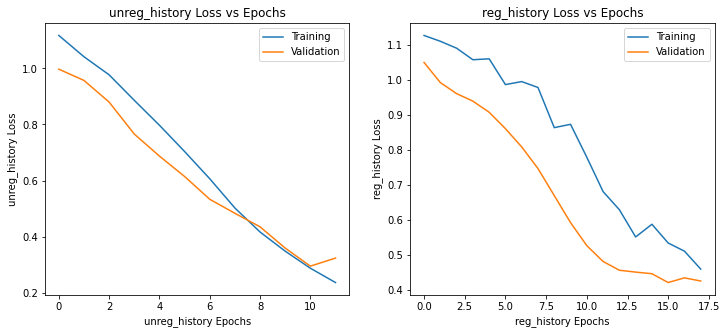

In [112]:
fig=plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.plot(unreg_history.history['loss'],label='Training')
plt.plot(unreg_history.history['val_loss'],label='Validation')
plt.legend()
plt.title('unreg_history Loss vs Epochs')
plt.ylabel('unreg_history Loss')
plt.xlabel('unreg_history Epochs')

fig.add_subplot(122)
plt.plot(reg_history.history['loss'],label='Training')
plt.plot(reg_history.history['val_loss'],label='Validation')
plt.legend()
plt.title('reg_history Loss vs Epochs')
plt.ylabel('reg_history Loss')
plt.xlabel('reg_history Epochs')

